In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

#df = pd.read_csv("NYC_Collisions.csv", parse_dates=["Date"], index_col ="Date")
df = pd.read_csv("NYC_Collisions.csv")
# CONCAT TWO COLUMNS
df["DateTime"] = df["Date"]+" "+df["Time"]
# PARSE DATATIME
df["DateTime"] = pd.to_datetime(df["DateTime"])
print(df.columns)
print("\n------------\n")
print(df.info())
print("\n------------\n")
print(df.iloc[0])
print("\n------------\n")
# DROP COLUMN: Cross Street
print("\nDROP COLUMN: Cross Street\n")
df.drop(["Cross Street"], axis =1, inplace = True)

Index(['Collision ID', 'Date', 'Time', 'Borough', 'Street Name',
       'Cross Street', 'Latitude', 'Longitude', 'Contributing Factor',
       'Vehicle Type', 'Persons Injured', 'Persons Killed',
       'Pedestrians Injured', 'Pedestrians Killed', 'Cyclists Injured',
       'Cyclists Killed', 'Motorists Injured', 'Motorists Killed', 'DateTime'],
      dtype='object')

------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238421 entries, 0 to 238420
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Collision ID         238421 non-null  int64         
 1   Date                 238421 non-null  object        
 2   Time                 238421 non-null  object        
 3   Borough              231224 non-null  object        
 4   Street Name          238058 non-null  object        
 5   Cross Street         111291 non-null  object        
 6   Latitude             216098 non-nul

In [2]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"]
vehicle_type.describe()

count unique                     top    freq
Vehicle Type                                                         
Bicycle                   5533      1                 Bicycle    5533
Bus                       4197      1                     Bus    4197
Construction               894      1            Construction     894
Delivery Vehicle          1695      1        Delivery Vehicle    1695
Emergency Services        1823      1      Emergency Services    1823
Fire Services              196      1           Fire Services     196
Limousine                   97      1               Limousine      97
Motorcycle                2009      1              Motorcycle    2009
Not Reported              3126      1            Not Reported    3126
Other                     1321      1                   Other    1321
Other (Open Passenger)      16      1  Other (Open Passenger)      16
Passenger Vehicle       201842      1       Passenger Vehicle  201842
Scooter                   2137      1                 Scooter    2137
Taxi                      6015      1                    Taxi    6015
Transport                 6642      1               Transport    6642
Unknown                     22      1                 Unknown      22
Utility Vehicle            856      1         Utility Vehicle     856

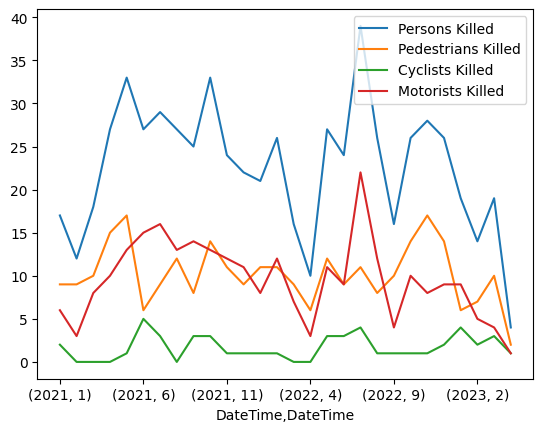

In [3]:
persons_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.year, df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

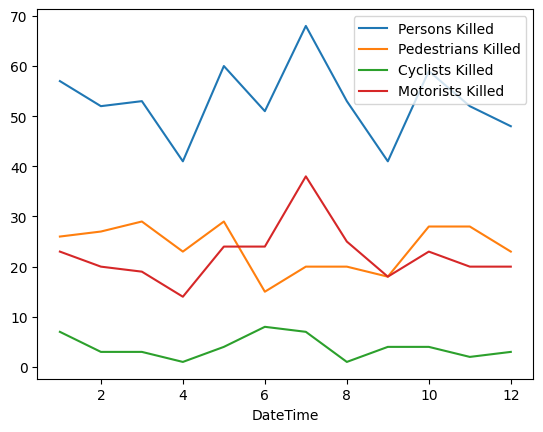

In [4]:
persons_killed = df.groupby([df["DateTime"].dt.month])["Persons Killed"].sum()
pedestrians_killed = df.groupby([df["DateTime"].dt.month])["Pedestrians Killed"].sum()
cyclists_killed = df.groupby([df["DateTime"].dt.month])["Cyclists Killed"].sum()
motorists_killed = df.groupby([df["DateTime"].dt.month])["Motorists Killed"].sum()

persons_killed.plot(x='Date', y='Persons Killed', legend=True)
pedestrians_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
cyclists_killed.plot(x='Date', y='Pedestrians Killed', legend=True)
motorists_killed.plot(x='Date', y='Motorists Killed', legend=True)
plt.show()

<Axes: title={'center': 'Collisions per vehicle type'}, xlabel='Vehicle Type', ylabel='Num collisions'>

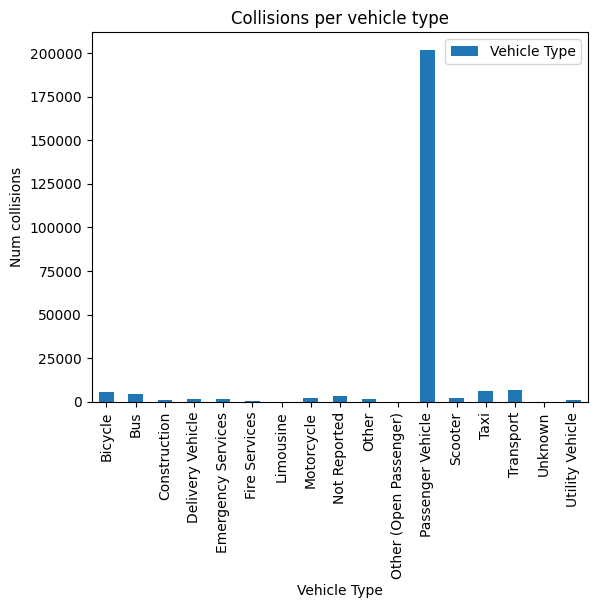

In [5]:
vehicle_type = df.groupby(df["Vehicle Type"])["Vehicle Type"].count()
vehicle_type.plot(kind='bar', ylabel='Num collisions', title='Collisions per vehicle type', legend=True)

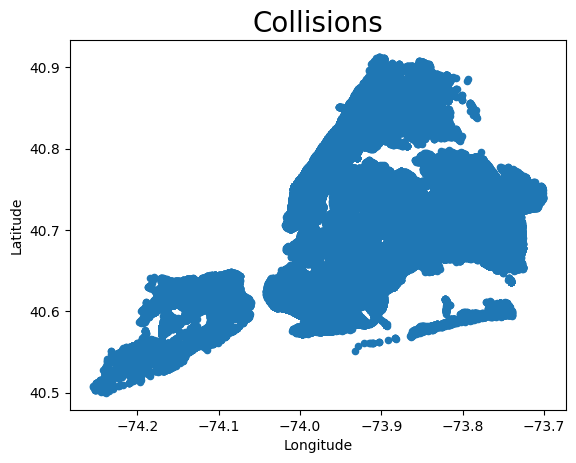

In [4]:
lat_long = df[["Latitude", "Longitude"]]
# lat_long.plot.scatter(y='Latitude', x='Longitude')
lat_long.plot(y='Latitude', x='Longitude', kind="scatter", legend=True)
# df.plot(y='Latitude', x='Longitude', kind="scatter")
plt.title('Collisions', fontsize=20) 
plt.show()

In [7]:
print('Min/max')
print('Latitude', lat_long["Latitude"].min(), '/', lat_long["Latitude"].max())
print('Longitude', lat_long["Longitude"].min(), '/', lat_long["Longitude"].max())

Min/max
Latitude 40.49971 / 40.912884
Longitude -74.25496 / -73.70061


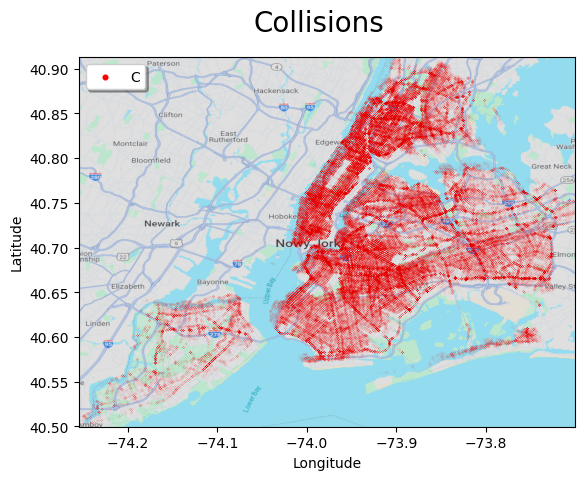

In [5]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])
#lat_long_killed.plot.scatter(y='Latitude', x='Longitude', legend=True)
ax.scatter(lat_long["Longitude"], lat_long["Latitude"], color='red', s=0.0005, alpha=1)
fig.suptitle('Collisions', fontsize=20) 
ax.legend(labels=('Collisions'), loc='upper left', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [8]:
lat_long_hour = df[["Latitude", "Longitude", "DateTime"]].copy()
lat_long_hour["Hour"] = lat_long_hour["DateTime"].dt.hour
# print(lat_long_datetime["DateTime"].dt.time.min())
# print(lat_long_datetime["DateTime"].dt.time.max())
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).size())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).head())
# print("\n------------\n")
# print(lat_long_datetime.groupby(lat_long_datetime["DateTime"].dt.hour).first())

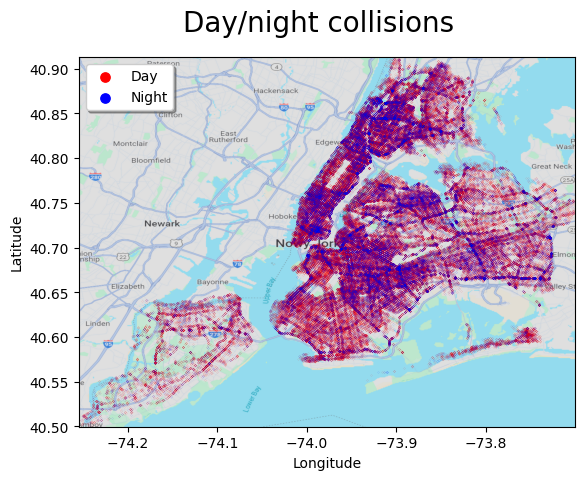

In [9]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Longitude"], 
           lat_long_hour.loc[lat_long_hour["Hour"].between(6,20), "Latitude"], 
           s=0.002, 
           c='red')
ax.scatter(lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Longitude"], 
           lat_long_hour.loc[(lat_long_hour["Hour"] < 6) | (lat_long_hour["Hour"] >20), "Latitude"], 
           s=0.002, 
           c='blue')
# ax.scatter(lat_long_datetime["Longitude"], lat_long_datetime["Latitude"], s=0.0005, c='blue')
# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Day/night collisions', fontsize=20) 
ax.legend(labels=('Day', 'Night'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [10]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
borough.count()
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------


-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


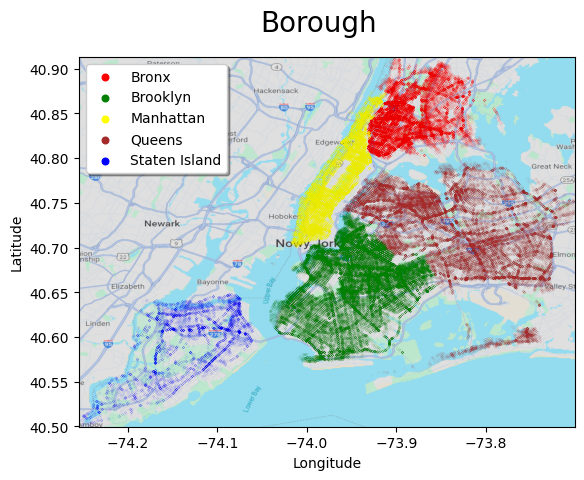

In [14]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough.loc[borough["Borough"] == 'Bronx', "Longitude"], 
           borough.loc[borough["Borough"] == 'Bronx', "Latitude"], 
           s=0.001, 
           c='red')
ax.scatter(borough.loc[borough["Borough"] == 'Brooklyn', "Longitude"], 
           borough.loc[borough["Borough"] == 'Brooklyn', "Latitude"], 
           s=0.001, 
           c='green')
ax.scatter(borough.loc[borough["Borough"] == 'Manhattan', "Longitude"], 
           borough.loc[borough["Borough"] == 'Manhattan', "Latitude"], 
           s=0.001, 
           c='yellow')
ax.scatter(borough.loc[borough["Borough"] == 'Queens', "Longitude"], 
           borough.loc[borough["Borough"] == 'Queens', "Latitude"], 
           s=0.001, 
           c='brown')
ax.scatter(borough.loc[borough["Borough"] == 'Staten Island', "Longitude"], 
           borough.loc[borough["Borough"] == 'Staten Island', "Latitude"], 
           s=0.001, 
           c='blue')


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Borough', fontsize=20) 
ax.legend(labels=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [6]:
borough = df.loc[:, ['Borough', 'Latitude', 'Longitude']].copy()
print(borough.groupby(borough['Borough'])['Borough'].count())
print('\n------- NULLS\n')
print('Borough', borough['Borough'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('Latitude', borough['Latitude'].isnull().sum())
print('\n-------\n')
print(borough.count())
print('\n-------\n')
borough.dropna(inplace=True)
print(borough.count())
print('\n-------\n')
borough.info()

Borough
Bronx            41255
Brooklyn         76416
Manhattan        38234
Queens           63751
Staten Island    11568
Name: Borough, dtype: int64

------- NULLS

Borough 7197
Latitude 22323
Latitude 22323

-------

Borough      231224
Latitude     216098
Longitude    216098
dtype: int64

-------

Borough      216098
Latitude     216098
Longitude    216098
dtype: int64

-------

<class 'pandas.core.frame.DataFrame'>
Index: 216098 entries, 0 to 238420
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Borough    216098 non-null  object 
 1   Latitude   216098 non-null  float64
 2   Longitude  216098 non-null  float64
dtypes: float64(2), object(1)
memory usage: 6.6+ MB


In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz

# putting feature variable to x
x = borough.drop(['Borough'], axis=1)
# putting target variable to y
y = borough['Borough']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
x_train, x_test, y_train, y_test

(         Latitude  Longitude
 754     40.738650 -73.993950
 105883  40.720130 -73.790380
 209707  40.742947 -73.974130
 78909   40.699420 -73.868780
 126394  40.826836 -73.922630
 ...           ...        ...
 147047  40.784245 -73.947100
 131121  40.737785 -73.922630
 119903  40.871440 -73.867165
 100837  40.702217 -73.804115
 71827   40.842750 -73.922830
 
 [151268 rows x 2 columns],
          Latitude  Longitude
 205337  40.780293 -73.945670
 83614   40.636550 -74.006744
 82640   40.767918 -73.985725
 221806  40.754143 -73.872220
 124978  40.631706 -73.946490
 ...           ...        ...
 65191   40.636078 -74.019714
 74600   40.592484 -73.994940
 86255   40.856744 -73.895264
 42790   40.733510 -73.874910
 185929  40.683537 -73.876915
 
 [64830 rows x 2 columns],
 754       Manhattan
 105883       Queens
 209707    Manhattan
 78909        Queens
 126394        Bronx
             ...    
 147047    Manhattan
 131121       Queens
 119903        Bronx
 100837       Queens
 71827     

In [10]:
dt_borough = DecisionTreeClassifier()
dt_borough.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred_train = dt_borough.predict(x_train)

In [10]:
print(classification_report(y_train, y_pred_train))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     26358
     Brooklyn       1.00      1.00      1.00     51236
    Manhattan       1.00      1.00      1.00     25177
       Queens       1.00      1.00      1.00     41219
Staten Island       1.00      1.00      1.00      7278

     accuracy                           1.00    151268
    macro avg       1.00      1.00      1.00    151268
 weighted avg       1.00      1.00      1.00    151268



In [21]:
print(confusion_matrix(y_train, y_pred_train))
print(accuracy_score(y_train, y_pred_train))

[[26420     0     5     0     0]
 [    0 51086     0     7     0]
 [    2     0 25171     0     0]
 [    0    27     0 41140     0]
 [    0     0     0     0  7410]]
0.9997289578760875


In [11]:
y_pred_default = dt_borough.predict(x_test)

In [23]:
print(classification_report(y_test, y_pred_default))

               precision    recall  f1-score   support

        Bronx       1.00      1.00      1.00     11357
     Brooklyn       1.00      1.00      1.00     21912
    Manhattan       1.00      1.00      1.00     10783
       Queens       1.00      1.00      1.00     17757
Staten Island       1.00      1.00      1.00      3021

     accuracy                           1.00     64830
    macro avg       1.00      1.00      1.00     64830
 weighted avg       1.00      1.00      1.00     64830



In [24]:
print(confusion_matrix(y_test, y_pred_default))
print(accuracy_score(y_test, y_pred_default))

[[11352     0     5     0     0]
 [    0 21902     0    10     0]
 [    3     1 10779     0     0]
 [    0    22     0 17735     0]
 [    0     0     0     0  3021]]
0.999367576739164


In [25]:
import pydotplus

features = list(x_train.columns)
dot_data = StringIO()
export_graphviz(dt_borough, out_file=dot_data, feature_names=features, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_pdf('borough.pdf') # file saved to currunt working directory
Image(graph.create_png())

In [12]:
y_pred = dt_borough.predict([[40.68, -73.97]])
y_pred

/root/Studia/python/analiza_danych/.venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Brooklyn'], dtype=object)

In [12]:
x_df = pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude'])
y_pred = dt_borough.predict(x_df)
y_pred

array(['Brooklyn'], dtype=object)

In [13]:
dt_borough.predict(pd.DataFrame([[40.68, -73.97]], columns=['Latitude','Longitude']))[0]

'Brooklyn'

In [89]:
dt_borough.predict(pd.DataFrame([[borough['Latitude'][1], borough['Longitude'][1]]], columns=['Latitude','Longitude']))[0]

'Brooklyn'

In [14]:
borough = borough.assign(Borough_fit = lambda x: (
    dt_borough.predict(
        pd.DataFrame([[x['Latitude'][5], x['Longitude'][5]]], columns=['Latitude','Longitude']))[0]))
borough.head()

Borough  Latitude  Longitude Borough_fit
0      Bronx  40.83398 -73.826350   Manhattan
1   Brooklyn  40.68730 -73.973656   Manhattan
3      Bronx  40.88270 -73.892730   Manhattan
4   Brooklyn  40.63791 -73.978640   Manhattan
5  Manhattan  40.84863 -73.927620   Manhattan

In [15]:
borough['Borough_fit'] = borough.apply(lambda x: 
                                       dt_borough.predict(
                                        pd.DataFrame(
                                            [[x['Latitude'], x['Longitude']]], columns=['Latitude','Longitude']
                                        ))[0]
                                       , axis=1)
borough.head(20)

Borough   Latitude  Longitude    Borough_fit
0           Bronx  40.833980 -73.826350          Bronx
1        Brooklyn  40.687300 -73.973656       Brooklyn
3           Bronx  40.882700 -73.892730          Bronx
4        Brooklyn  40.637910 -73.978640       Brooklyn
5       Manhattan  40.848630 -73.927620      Manhattan
6        Brooklyn  40.660090 -73.900550       Brooklyn
7        Brooklyn  40.705807 -73.931760       Brooklyn
8        Brooklyn  40.663227 -73.931590       Brooklyn
9        Brooklyn  40.671482 -73.882840       Brooklyn
10         Queens  40.656384 -73.753060         Queens
11       Brooklyn  40.727700 -73.946090       Brooklyn
12          Bronx  40.818047 -73.922460          Bronx
13       Brooklyn  40.622997 -73.975685       Brooklyn
14      Manhattan  40.766277 -73.977690      Manhattan
15         Queens  40.782280 -73.914604         Queens
16  Staten Island  40.628098 -74.111040  Staten Island
18       Brooklyn  40.610947 -73.962555       Brooklyn
19         Queens  40.772040 -73.792370         Queens
20       Brooklyn  40.656400 -73.903450       Brooklyn
21          Bronx  40.811638 -73.931600          Bronx

In [16]:
borough.to_csv('borough.csv', index=False)

In [ ]:
borough = borough.assign(Borough_fit = lambda x: (
    dt_borough.predict(
        pd.DataFrame([[x['Latitude'], x['Longitude']]], columns=['Latitude','Longitude']))[0]))
borough.head()

In [11]:
borough2 = pd.read_csv('borough.csv')

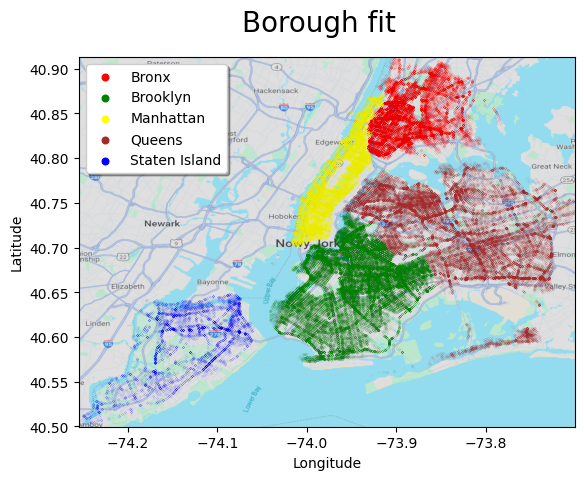

In [12]:
img = plt.imread("map.png")
fig, ax = plt.subplots() # figsize=(20, 10)
img = ax.imshow(img, extent=[-74.25496, -73.70061, 40.49971, 40.912884])

ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Bronx', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Bronx', "Latitude"], 
           s=0.001, 
           c='red')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Brooklyn', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Brooklyn', "Latitude"], 
           s=0.001, 
           c='green')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Manhattan', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Manhattan', "Latitude"], 
           s=0.001, 
           c='yellow')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Queens', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Queens', "Latitude"], 
           s=0.001, 
           c='brown')
ax.scatter(borough2.loc[borough2["Borough_fit"] == 'Staten Island', "Longitude"], 
           borough2.loc[borough2["Borough_fit"] == 'Staten Island', "Latitude"], 
           s=0.001, 
           c='blue')


# fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(lat_long_datetime["DateTime"].min().value, 
#                                                              lat_long_datetime["DateTime"].max().value), cmap='viridis'), 
#              ax=ax, orientation='vertical', label='a colorbar label')
fig.suptitle('Borough fit', fontsize=20) 
ax.legend(labels=('Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'), loc='best', shadow=True, markerscale=150)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()